In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime,time

In [15]:
csv_path = "D:\programming/projects/personal_project/2022/pro1_kospi/src_code/crawling_code/total.csv"
price_df=pd.read_csv(csv_path,index_col=0,header=0)

In [16]:
print(type(price_df))

print("price_df")
print(price_df)

print("price_df.describe()")
print(price_df.describe())
print("price_df.info()")
price_df.info()
print("price_df.shape")
print(price_df.shape)

<class 'pandas.core.frame.DataFrame'>
price_df
            kospi200  s&p 500  shanghai  nikkei 225  us_rates  jp_rates  \
2021-05-10    435.63  4188.43   3427.99    29518.34    1113.5   1023.96   
2021-05-11    428.77  4152.10   3441.85    28608.59    1119.0   1029.20   
2021-05-12    421.86  4063.04   3462.75    28147.51    1125.5   1035.47   
2021-05-13    416.07  4112.50   3429.54    27448.01    1133.5   1033.74   
2021-05-14    420.17  4173.85   3490.38    28084.47    1129.5   1032.78   
...              ...      ...       ...         ...       ...       ...   
2022-01-10    387.52  4670.29   3593.52    28478.56    1198.0   1036.56   
2022-01-11    388.97  4713.07   3567.44    28222.48    1194.0   1034.08   
2022-01-12    394.66  4726.35   3597.43    28765.66    1192.5   1032.78   
2022-01-13    393.00  4659.03   3555.26    28489.13    1185.5   1035.15   
2022-01-14    387.45  4662.85   3521.26    28124.28    1190.0   1041.89   

            ch_rates  
2021-05-10    173.79  
2021-0

In [17]:
price_df["month"] =[i[-5:-3] for i in list(price_df.index)]
price_df["year"] =[i[:4] for i in list(price_df.index)]

print(price_df)

            kospi200  s&p 500  shanghai  nikkei 225  us_rates  jp_rates  \
2021-05-10    435.63  4188.43   3427.99    29518.34    1113.5   1023.96   
2021-05-11    428.77  4152.10   3441.85    28608.59    1119.0   1029.20   
2021-05-12    421.86  4063.04   3462.75    28147.51    1125.5   1035.47   
2021-05-13    416.07  4112.50   3429.54    27448.01    1133.5   1033.74   
2021-05-14    420.17  4173.85   3490.38    28084.47    1129.5   1032.78   
...              ...      ...       ...         ...       ...       ...   
2022-01-10    387.52  4670.29   3593.52    28478.56    1198.0   1036.56   
2022-01-11    388.97  4713.07   3567.44    28222.48    1194.0   1034.08   
2022-01-12    394.66  4726.35   3597.43    28765.66    1192.5   1032.78   
2022-01-13    393.00  4659.03   3555.26    28489.13    1185.5   1035.15   
2022-01-14    387.45  4662.85   3521.26    28124.28    1190.0   1041.89   

            ch_rates month  year  
2021-05-10    173.79    05  2021  
2021-05-11    174.24    05  2

In [18]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = StandardScaler()

print("price_df.keys()")
print(price_df.keys())

price_df.keys()
Index(['kospi200', 's&p 500', 'shanghai', 'nikkei 225', 'us_rates', 'jp_rates',
       'ch_rates', 'month', 'year'],
      dtype='object')


In [19]:
total_keys = list(price_df.keys())[:-2]
print(total_keys)

['kospi200', 's&p 500', 'shanghai', 'nikkei 225', 'us_rates', 'jp_rates', 'ch_rates']


In [20]:
# price_df.loc[:,['s&p 500', 'shanghai', 'nikkei 225']]=scaler.fit_transform(price_df.loc[:,['s&p 500', 'shanghai', 'nikkei 225']])*100
# price_df.loc[:,["kospi200"]]=scaler.fit_transform(price_df.loc[:,["kospi200"]])*100


price_df.loc[:,total_keys[1:3+1]]=scaler.fit_transform(price_df.loc[:,total_keys[1:3+1]])*100
price_df.loc[:,total_keys[0:1]]=scaler.fit_transform(price_df.loc[:,total_keys[0:1]])*100


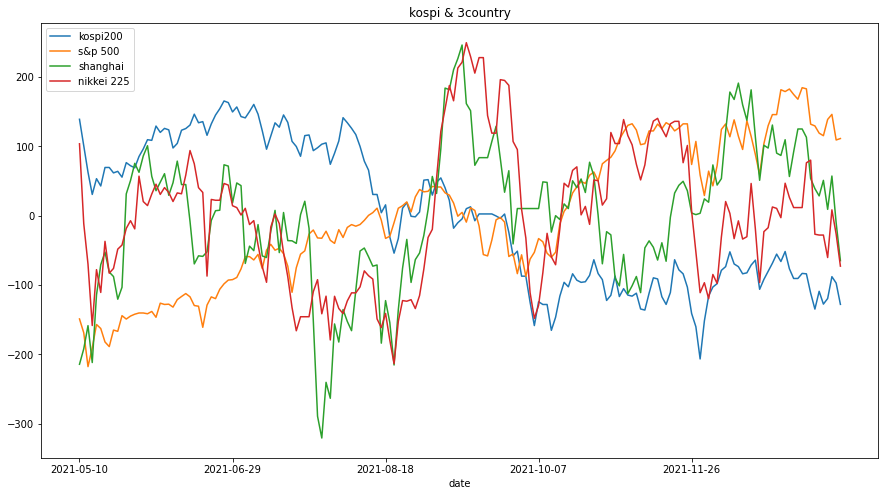

In [21]:

plt.figure(figsize=(15,8))
for key in total_keys[:4]:
    plt.plot(price_df[key],label=key)


plt.xlabel("date")
plt.title("kospi & 3country")
length = len(price_df)
labels=[price_df.index[(i*length)//5] for i in range(5)]
plt.xticks(range(0,length,length//5),labels)
plt.legend(loc=0)
plt.show()


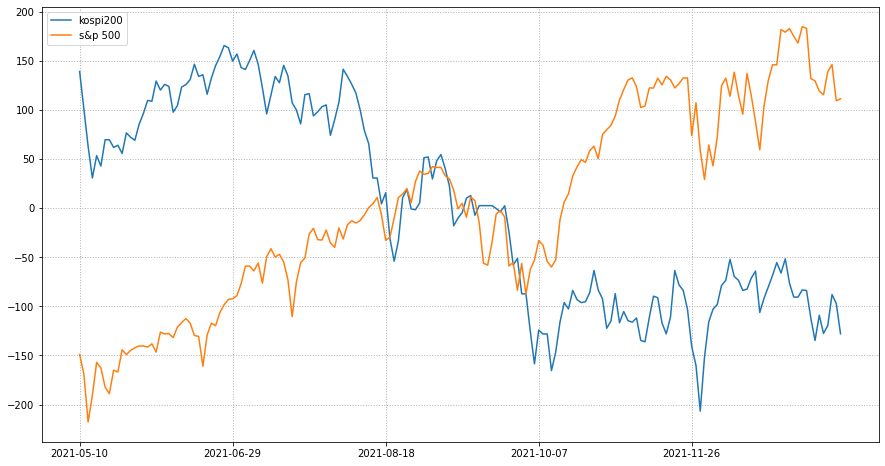

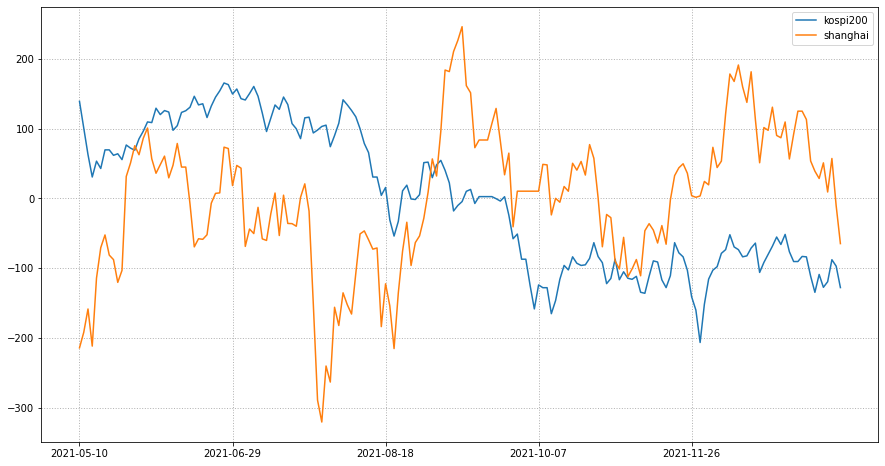

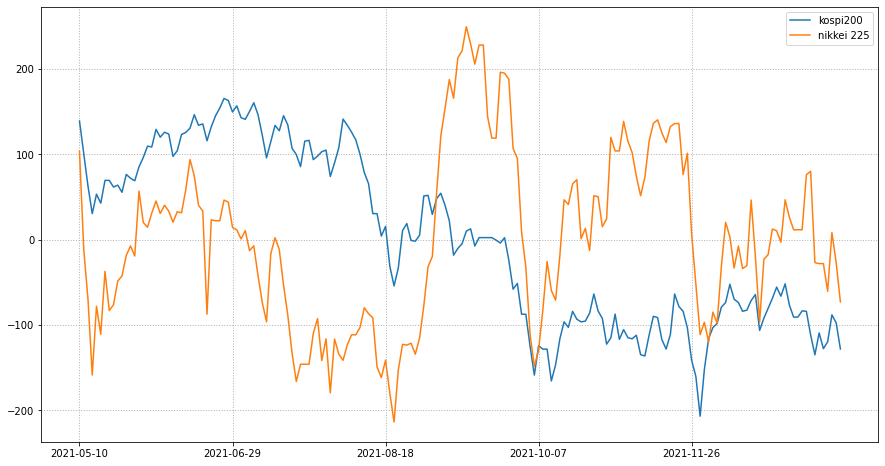

In [22]:

#####################################################
for i,key in enumerate(total_keys[1:3+1]):
    plt.figure(figsize=(15,8))

    labels=[price_df.index[(i*length)//5] for i in range(5)]
    plt.xticks(range(0,length,length//5),labels)
    plt.grid(True, color='0.7', linestyle=':', linewidth=1)


    plt.plot(price_df[total_keys[0]],label=total_keys[0])
    plt.plot(price_df[key],label=key)

    plt.legend(loc=0)
    plt.show()

#####################################################



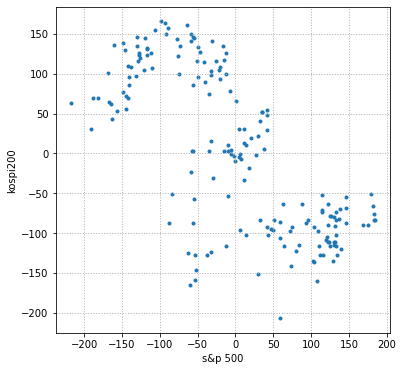

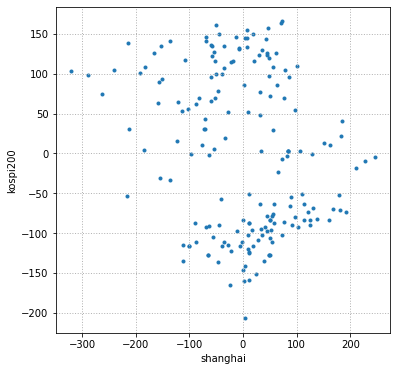

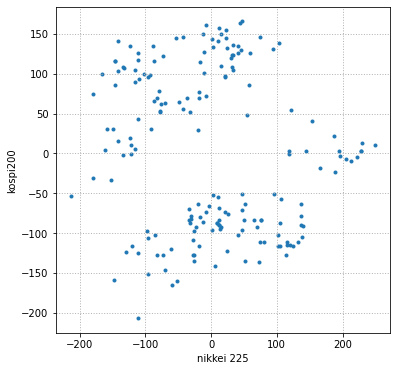

In [23]:



for key in total_keys[1:4]:
    plt.figure(figsize=(6,6))
    plt.scatter(price_df[key],price_df[total_keys[0]],marker=".")
    plt.grid(True, color='0.7', linestyle=':', linewidth=1)
    plt.xlabel(key)
    plt.ylabel(total_keys[0])

    plt.show()


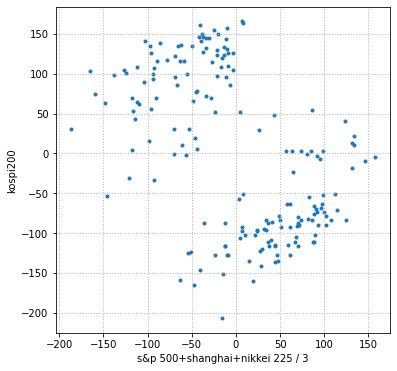

In [24]:


plt.figure(figsize=(6,6))
plt.scatter((price_df[total_keys[1]]+price_df[total_keys[2]]+price_df[total_keys[3]])/3,price_df[total_keys[0]],marker=".")
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.xlabel(f"{total_keys[1]}+{total_keys[2]}+{total_keys[3]} / 3")
plt.ylabel("kospi200")

plt.show()


Text(0, 0.5, 'kospi200')

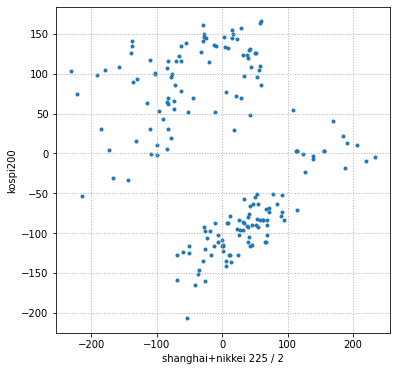

In [25]:

plt.figure(figsize=(6,6))
plt.scatter((price_df[total_keys[2]]+price_df[total_keys[3]])/2,price_df[total_keys[0]],marker=".")
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.xlabel(f"{total_keys[2]}+{total_keys[3]} / 2")
plt.ylabel("kospi200")


In [26]:
csv_path = "D:\programming/projects/personal_project/2022/pro1_kospi/src_code/crawling_code/total.csv"
price_df=pd.read_csv(csv_path,index_col=0,header=0)

price_df["month"] =[i[-5:-3] for i in list(price_df.index)]
price_df["year"] =[i[:4] for i in list(price_df.index)]

In [27]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()


price_df.loc[:,total_keys[1:3+1]]=scaler.fit_transform(price_df.loc[:,total_keys[1:3+1]])*100
price_df.loc[:,total_keys[0:1]]=scaler.fit_transform(price_df.loc[:,total_keys[0:1]])*100

In [28]:
sns.set(style="darkgrid")#style must be one of white, dark, whitegrid, darkgrid, ticks


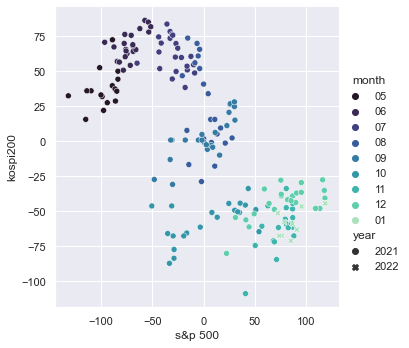

In [29]:
#x - snp500 y- kospi200 

sns.relplot(x=total_keys[1],y=total_keys[0],data=price_df,hue="month",style ="year", palette="mako")#hue = 색상 , style - maeker style
plt.show()

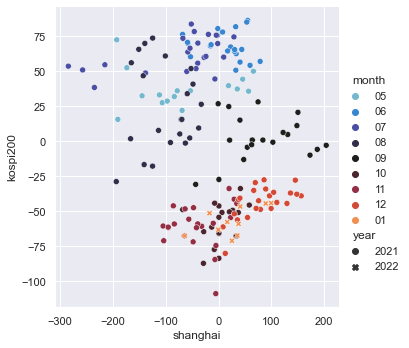

In [30]:
#x - nikkei225 y- kospi200 

sns.relplot(x=total_keys[2],y=total_keys[0],data=price_df,hue="month",style ="year", palette="icefire")#hue = 색상 , style - maeker style
plt.show()


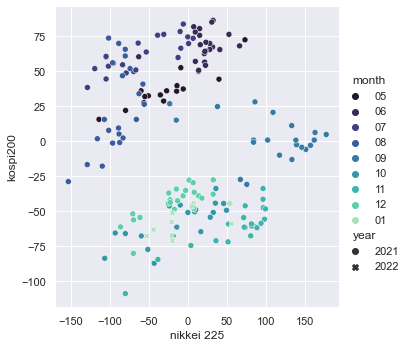

In [31]:
#x - shanghai y- kospi200 

sns.relplot(x=total_keys[3],y=total_keys[0],data=price_df,hue="month",style ="year", palette="mako")#hue = 색상 , style - maeker style
plt.show()


In [98]:

import math
csv_path = "D:\programming/projects/personal_project/2022/pro1_kospi/src_code/crawling_code/total.csv"
price_df=pd.read_csv(csv_path,index_col=0,header=0)
price_df= price_df[total_keys[0:4]]
print(price_df)


            kospi200  s&p 500  shanghai  nikkei 225
2021-05-10    435.63  4188.43   3427.99    29518.34
2021-05-11    428.77  4152.10   3441.85    28608.59
2021-05-12    421.86  4063.04   3462.75    28147.51
2021-05-13    416.07  4112.50   3429.54    27448.01
2021-05-14    420.17  4173.85   3490.38    28084.47
...              ...      ...       ...         ...
2022-01-10    387.52  4670.29   3593.52    28478.56
2022-01-11    388.97  4713.07   3567.44    28222.48
2022-01-12    394.66  4726.35   3597.43    28765.66
2022-01-13    393.00  4659.03   3555.26    28489.13
2022-01-14    387.45  4662.85   3521.26    28124.28

[180 rows x 4 columns]


In [99]:

price_df["month"] =[i[-5:-3] for i in list(price_df.index)]
price_df["year"] =[i[:4] for i in list(price_df.index)]

price_df["quarter"] =[ str(math.ceil(int(i[-5:-3])/3))+"q" for i in list(price_df.index) if i]


In [100]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# mapping

price_df.loc[:,total_keys[1:3+1]]=scaler.fit_transform(price_df.loc[:,total_keys[1:3+1]])*100
price_df.loc[:,total_keys[0:1]]=scaler.fit_transform(price_df.loc[:,total_keys[0:1]])*100


                kospi200  nikkei 225     s&p 500   shanghai
year quarter                                               
2021 2q       106.588951    2.696478 -139.027502 -15.257920
     3q        56.525386  -17.814725  -20.606283 -27.026698
     4q      -101.489634   17.255246   79.895959  29.721935
2022 1q      -108.273980   -6.554057  136.992647  40.191531


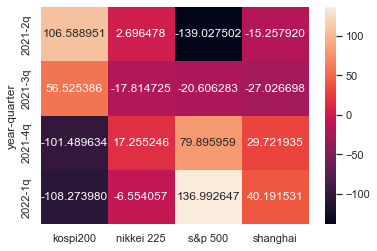

In [101]:


pivot = pd.pivot_table(price_df,index=["year","quarter"])

print(pivot)

sns.heatmap(pivot, annot=True, fmt='f')
plt.show()